In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

In [2]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Observations:
All the attributes are integers except BMI & DiabetesPedigreeFunction. There are no null values observed so far.

In [3]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Observations: 
Even though there are no null values, Data definitely has some missing values. For example, minimum value for bloodpressure can't be zero and the same goes with Insulin and BMI. For better accuracy in forescasting, dropping those records from training dataset.

In [4]:
d1 = diabetes["BloodPressure"] != 0
d2 = diabetes["Insulin"] != 0
d3 = diabetes["BMI"] !=0
d4 = diabetes[d1 & d2 & d3]
d4

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
16,0,118,84,47,230,45.8,0.551,31,1
18,1,103,30,38,83,43.3,0.183,33,0
19,1,115,70,30,96,34.6,0.529,32,1
20,3,126,88,41,235,39.3,0.704,27,0


In [5]:
d4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 3 to 765
Data columns (total 9 columns):
Pregnancies                 393 non-null int64
Glucose                     393 non-null int64
BloodPressure               393 non-null int64
SkinThickness               393 non-null int64
Insulin                     393 non-null int64
BMI                         393 non-null float64
DiabetesPedigreeFunction    393 non-null float64
Age                         393 non-null int64
Outcome                     393 non-null int64
dtypes: float64(2), int64(7)
memory usage: 30.7 KB


In [6]:
d4.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000
mean,3.295165,122.315522,70.671756,29.122137,155.717557,33.072519,0.522476,30.839695,0.330789
std,3.209425,31.435992,12.481277,10.513128,118.879630,7.023947,0.345232,10.199903,0.471097
min,0.000000,0.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.000000,28.400000,0.270000,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.000000,33.200000,0.447000,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In the above result, we can now see minimum values as non-zeroes.However, after eliminating zero values, data set has been reduced to almost 50% of the records. Eliminating 50% records is not an ideal situation. Let's try to fill the zeroes.

In [7]:
diabetes["BloodPressure"].replace(to_replace = 0, value = diabetes["BloodPressure"].mean(), inplace = True)
diabetes["Glucose"].replace(to_replace = 0, value = diabetes["Glucose"].mean(), inplace = True)
diabetes["SkinThickness"].replace(to_replace = 0, value = diabetes["SkinThickness"].mean(), inplace = True)
diabetes["Insulin"].replace(to_replace = 0, value = diabetes["Insulin"].mean(), inplace = True)

In [8]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
(diabetes["SkinThickness"] == 0).value_counts()

False    768
Name: SkinThickness, dtype: int64

In [10]:
(diabetes["Insulin"] == 0).value_counts()

False    768
Name: Insulin, dtype: int64

In [11]:
(diabetes["BMI"] == 0).value_counts()

False    757
True      11
Name: BMI, dtype: int64

Since there are only 11 records with zero BMI, am dropping them

In [12]:
diabetes = diabetes[diabetes["BMI"] !=0]

In [13]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000
mean,3.844122,121.934574,72.246966,26.688174,119.212695,32.457464,0.472437,33.281374,0.351387
std,3.369959,30.499954,12.160110,9.676299,93.640648,6.924988,0.329474,11.697752,0.477719
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,20.536458,79.799479,27.500000,0.244000,24.000000,0.000000
50%,3.000000,118.000000,72.000000,23.000000,79.799479,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.600000,0.627000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We finally have 757 out of 768 records for analysis. Since the dataset is with non-zero values (Minimum vaues are not zeroes), we can consider this finally.

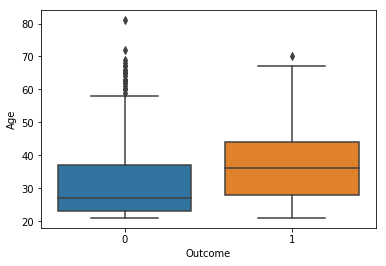

In [14]:
sns.boxplot(x = "Outcome", y = "Age", data = diabetes)

# Observations
It can be inferred that subjects of older age are more diagnosed with diabetes as shown in the above plot. The median age is lying around 38 & there is only one outlier. 
It is surpirising to see the minimum age of subjects diagnosed with diabetes is 21 only (too young).
Considering age, there are many outliers where in the subjects are not diagnosed to diabetes.

In [15]:
D1 = (diabetes["Outcome"] == 1)
D0 = (diabetes["Outcome"] == 0)
DB1 = diabetes[D1].drop(labels = "Outcome", axis = 1)
DB0 = diabetes[D0].drop(labels = "Outcome", axis =1)

In [16]:
DB1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,4.834586,142.326275,74.893166,28.970434,141.889959,35.406767,0.552786,37.030075
std,3.736976,29.591021,11.986808,10.303339,112.340719,6.614982,0.372814,10.951654
min,0.000000,78.000000,30.000000,7.000000,14.000000,22.900000,0.088000,21.000000
25%,1.250000,119.250000,68.000000,20.536458,79.799479,30.900000,0.265000,28.000000
50%,4.000000,140.000000,74.000000,27.000000,79.799479,34.300000,0.451500,36.000000
75%,8.000000,167.000000,82.000000,36.000000,167.750000,38.925000,0.730000,44.000000
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000


In [17]:
DB0.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,3.307536,110.887339,70.813383,25.451757,106.927253,30.859674,0.428908,31.250509
std,3.024580,24.772206,12.023834,9.093242,79.201672,6.560737,0.294806,11.597166
min,0.000000,44.000000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000
25%,1.000000,93.500000,62.000000,20.536458,79.799479,25.600000,0.230500,23.000000
50%,2.000000,108.000000,70.000000,21.000000,79.799479,30.100000,0.337000,27.000000
75%,5.000000,125.000000,78.000000,31.000000,105.000000,35.300000,0.560500,37.000000
max,13.000000,197.000000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000


In [18]:
mean_0 = DB0.mean()
mean_1 = DB1.mean()
list_0 = []
list_1 = []
for col in DB1.columns:
    list_0.append(mean_0[col])
    list_1.append(mean_1[col])
list_1

[4.834586466165414,
 142.32627467105263,
 74.89316553101504,
 28.970433897243076,
 141.8899592731829,
 35.40676691729318,
 0.5527857142857143,
 37.03007518796993]

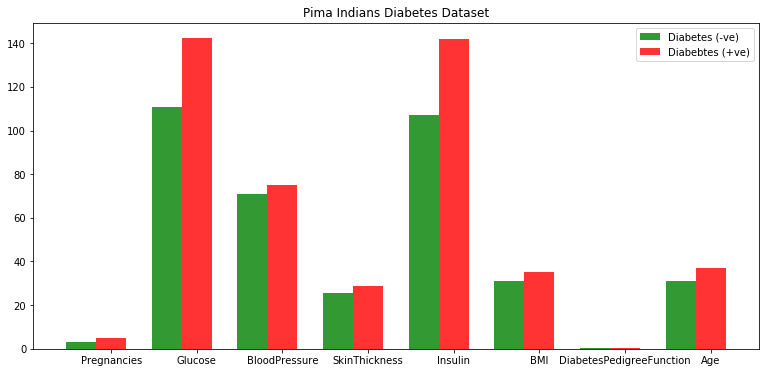

In [19]:
plt.figure(figsize=(13,6))
index = np.arange(len(DB1.columns))
bar_width = 0.35
opacity = 0.8
plt.title('Pima Indians Diabetes Dataset')
plt.bar(index, list_0, bar_width, alpha=opacity, color='g', label='Diabetes (-ve)')
plt.bar(index + bar_width, list_1, bar_width, alpha=opacity, color='r', label='Diabebtes (+ve)')
plt.xticks(index + bar_width, DB1.columns)
plt.legend()

# Observation
From the above graph, we can see that the concentration of gluose and insulin levels are much higher in women diagnosed to diagnosed to diabetes.
In case of other attributes, the variation is not significant as we can see from the plot. However, we can't say that other attributes are not impacting to cause diabetes. We can only say the impact is lesser as shown from the plot.

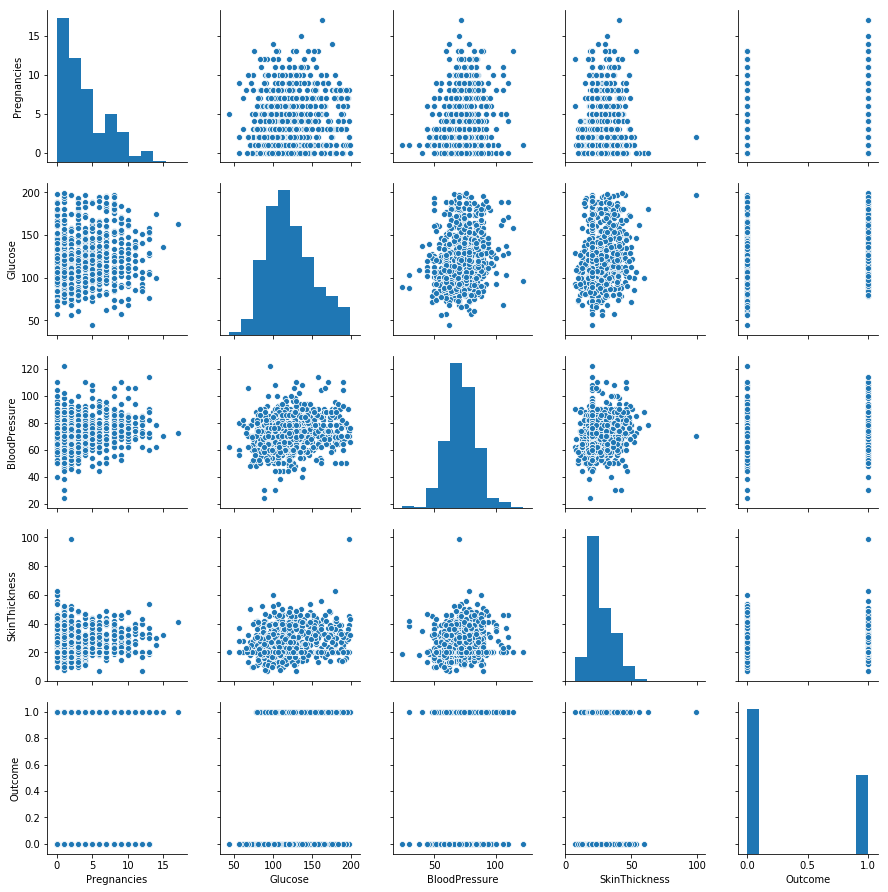

In [21]:
sns.pairplot(diabetes[["Pregnancies","Glucose","BloodPressure","SkinThickness","Outcome"]])

# Observations
Let's compare the outcome with other attributes:
1. Bloodpressure doesn't seem to have greater impact on diabetes as women with low & high BP are diagnosed with diabetes. The dataset consists of subjects with blood pressures ranging from 24 - 120. However it can be seen they are equally prone to diabetes. Almost 40% of the subjects are falling above the ideal/optimal BP (which is 80), however people with less than optimal BP are also diagnosed with diabetes. In fact, people with less BP are diagnosed with diabetes.
2. Glucose has direct impact on the diabetes. Subjects with high concnetrations of glucose are diagnosed with diabetes. We can see more concentration in outcome comparing with less concentration of glucose.
3. It looks like, the increase in number of pregrancies in number of pregranscies results in high chances of getting diagnosed with diabetes.
4. Skin thickness seems no relation with the outcome as subjects are equally distributed towards the outcome. We can see a subject with more thickness is diagosed with diabetes. This seems to be an outlier and can't be considered/concluded that more skin thickness will lead to diagnosis. Moreover, we can also see tha people with less skinthickness scattered more with high concentration of glucose levels.

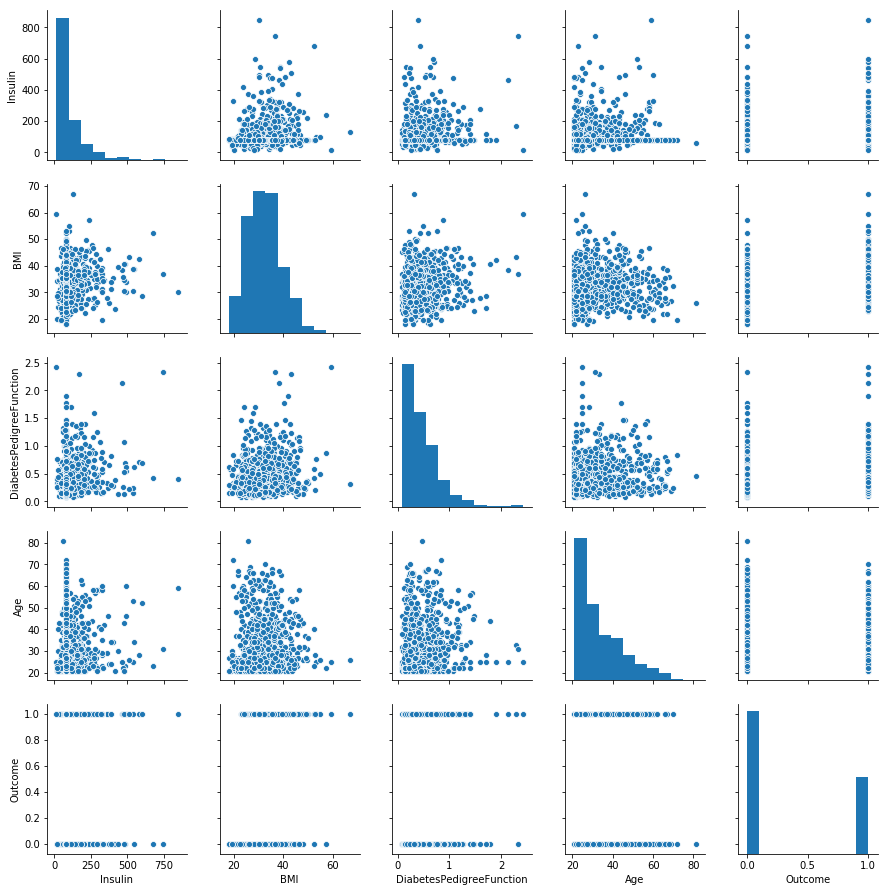

In [22]:
sns.pairplot(diabetes[["Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]])

# Observations:
1. Age is not co-related with the outcome of diagnosing with diabetes. All the ages are equally distributed. In fact, subject who are really young (age 24) are diagnosed with diabetes. 
2. Insulin levels are directly related to getting diagnosed with diabetes. We can observe, concentration of insulin is increasing over the age. Age is indirectly leading to more chances of getting diagnosed with diabetes.
3. With the increase in BMI, subjects are diagnosed with diabetes. We can see no cases of diabetes when the BMI is less than 30 and diagnosis keeps increasing with the increase in BMI. Also BMI is incresaing with the age. So even though age has lesser impact on getting diagnosed with impact, increase in age may result in higher BMI which might lead to diabetes.
4. It looks like age is one of important factor to be considered as concentration of insulina and levels of BMI are increasting over age.
5. DiabetesPedigreeFunction: DiabetesPedigreeFunction(DPF) has been developed to provide a synthesis of the diabetes history in relatives and the genetic relationship of those relatives to the subject. The DPF uses information from parents, grandparents, full and half siblings, full and half aunts and uncles, and first cousins. It provides a measure of the expected genetic influence of affected and unaffected relatives on the subject's eventual diabetes risk. However, DPF seems to have no impact on getting diagnosed with diabetes. All the DPF values are equally distributed over the outcomes. From the plot, we can say diabetes is not heriditary.

In [27]:
corr = diabetes.corr()

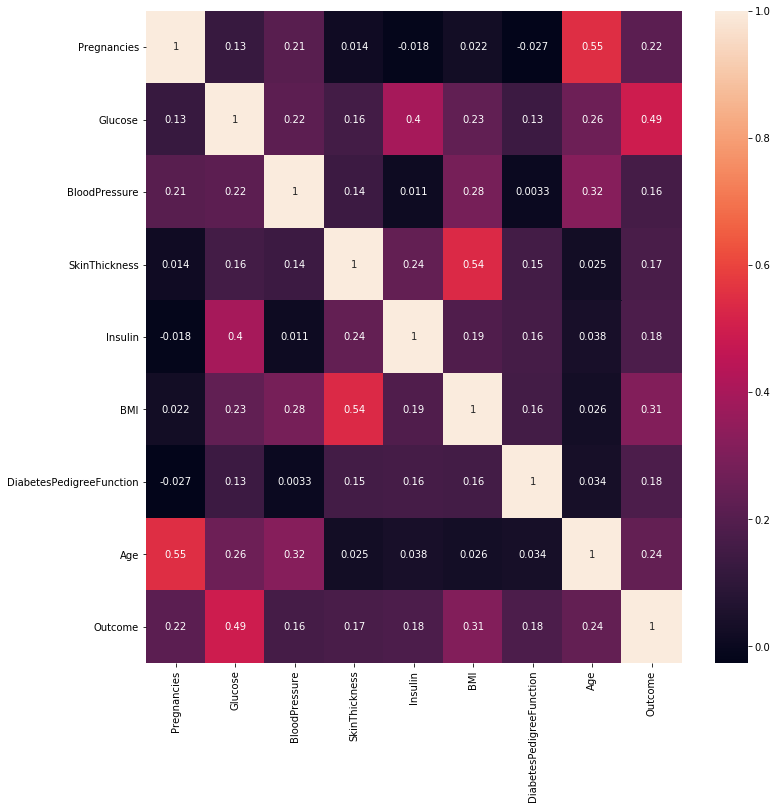

In [32]:
plt.figure(figsize = (12,12))
sns.heatmap(corr,annot=corr)

# Observations:
1. Age & Pregnacies, BMI & Skin thickness, Insulin & Glucsse seems to be highly correlated. Am conisdering more than 0.4 as highly correlated.
2. As unlikely stated in previous observations, Age & BMI & Age & Glucose are less corelated. It seems Age is not an important factor og having diagnosed with diabetes.
3. Also, DPF is not much corealted with any other attribites and also with the outcome. It turns out that diabetes is not heriditary.